In [75]:
import os
import glob
import pathlib
import time

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
import torchvision
from torch.nn import Linear, ReLU, Sigmoid, Tanh, LeakyReLU
from torchvision import transforms
from torch.autograd import Variable
from torchvision import models

In [3]:
%matplotlib inline

In [4]:
my_layer = Linear(in_features=10, out_features=5, bias=True)

In [6]:
inp = Variable(torch.randn(1, 10))

In [7]:
inp

tensor([[-0.7830,  0.7448, -0.2264,  0.9747,  0.0764,  0.3088, -2.7725,
          0.3225,  0.7063,  0.8082]])

In [8]:
my_layer

Linear(in_features=10, out_features=5, bias=True)

In [9]:
my_layer.weight

Parameter containing:
tensor([[-0.0460, -0.2855,  0.1277,  0.2432, -0.1720, -0.2212, -0.1850,
          0.2518, -0.0846, -0.1038],
        [ 0.1400, -0.1163,  0.1220, -0.0834,  0.2542,  0.2059, -0.1811,
         -0.2525, -0.3124, -0.2949],
        [-0.2996, -0.1086,  0.1884, -0.1230,  0.1095, -0.2109,  0.2205,
         -0.1653, -0.2469,  0.0526],
        [-0.1676, -0.2617, -0.1620, -0.2311, -0.0271,  0.1016,  0.2334,
         -0.2036,  0.0576, -0.3053],
        [-0.2479, -0.1054, -0.1779, -0.1013,  0.1687,  0.3162,  0.0324,
          0.1237,  0.1918, -0.1118]])

In [10]:
my_layer(inp)

tensor([[ 0.3504, -0.5538, -0.6076, -0.9226,  0.2421]])

In [11]:
my_layer.weight

Parameter containing:
tensor([[-0.0460, -0.2855,  0.1277,  0.2432, -0.1720, -0.2212, -0.1850,
          0.2518, -0.0846, -0.1038],
        [ 0.1400, -0.1163,  0.1220, -0.0834,  0.2542,  0.2059, -0.1811,
         -0.2525, -0.3124, -0.2949],
        [-0.2996, -0.1086,  0.1884, -0.1230,  0.1095, -0.2109,  0.2205,
         -0.1653, -0.2469,  0.0526],
        [-0.1676, -0.2617, -0.1620, -0.2311, -0.0271,  0.1016,  0.2334,
         -0.2036,  0.0576, -0.3053],
        [-0.2479, -0.1054, -0.1779, -0.1013,  0.1687,  0.3162,  0.0324,
          0.1237,  0.1918, -0.1118]])

In [12]:
my_layer.bias

Parameter containing:
tensor([-0.0503, -0.2933,  0.2545,  0.2192,  0.0791])

In [13]:
my_layer1 = Linear(10, 5)
my_layer2 = Linear(5, 2)

In [14]:
my_layer2(my_layer1(inp))

tensor([[-0.0973,  0.1215]])

In [15]:
my_layer2.bias

Parameter containing:
tensor([ 0.1970, -0.0273])

In [17]:
sample_data = Variable(torch.Tensor([[1, 2, -1, -1]]))

In [18]:
relu = ReLU()

In [19]:
relu(sample_data)

tensor([[ 1.,  2.,  0.,  0.]])

In [20]:
class MyFirstNetwork(torch.nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size):
        super(MyFirstNetwork, self).__init__()
        self.layer1 = Linear(input_size, hidden_size)
        self.layer2 = Linear(hidden_size, output_size)
    
    def __forward__(self, inp):
        out = self.layer1(inp)
        out = ReLU(out)
        out = self.layer2(out)
        return out

In [24]:
mse_loss = torch.nn.MSELoss()
inp = Variable(torch.randn(3, 5), requires_grad=True)
target = Variable(torch.randn(3, 5))
output = mse_loss(inp, target)
output.backward()

In [25]:
output

tensor(1.6630)

In [23]:
def crossentropy(true_label, prediction):
    if true_label == 1:
        return -torch.log(prediction)
    else:
        return -torch.log(1 - prediction)

In [26]:
ce_loss = torch.nn.CrossEntropyLoss()
inp = Variable(torch.randn(3, 5), requires_grad=True)
target = Variable(torch.LongTensor(3).random_(5))
output = ce_loss(inp, target)
output.backward()

In [27]:
output

tensor(2.5850)

In [ ]:
# for input, target in dataset:
#     optimizer.zero_grad()
#     output = model(input)
#     loss = loss_fn(output, target)
#     loss.backward()
#     optimizer.step()

In [29]:
path = 'chapter3/dogsandcats/'

In [34]:
files = glob.glob(os.path.join(path, '*.jpg'))

In [35]:
no_of_images = len(files)

In [36]:
print(f"Total no of images: {no_of_images}")

Total no of images: 25000


In [37]:
shuffle = np.random.permutation(no_of_images)

In [38]:
os.mkdir(os.path.join(path, 'train'))

In [39]:
os.mkdir(os.path.join(path, 'valid'))

In [40]:
for t in ('train', 'valid'):
    for folder in ('dog/', 'cat/'):
        os.mkdir(os.path.join(path, t, folder))

In [42]:
!ls chapter3/dogsandcats/train/dog/

In [44]:
for i in shuffle[:2000]:
    folder = files[i].split('/')[-1].split('.')[0]
    image = files[i].split('/')[-1]
    os.rename(files[i], os.path.join(path, 'valid', folder, image))

In [45]:
for i in shuffle[2000:]:
    folder = files[i].split('/')[-1].split('.')[0]
    image = files[i].split('/')[-1]
    os.rename(files[i], os.path.join(path, 'train', folder, image))

In [48]:
len(os.listdir('chapter3/dogsandcats/train/dog/'))

11497

In [53]:
simple_transform = transforms.Compose(
    [
        transforms.Scale((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]
)

In [55]:
train = torchvision.datasets.ImageFolder('chapter3/dogsandcats/train/', simple_transform)
valid = torchvision.datasets.ImageFolder('chapter3/dogsandcats/valid/', simple_transform)

In [56]:
type(train)

torchvision.datasets.folder.ImageFolder

In [57]:
type(train.imgs)

list

In [58]:
len(train.imgs)

23000

In [59]:
train.class_to_idx

{'cat': 0, 'dog': 1}

In [60]:
train.classes

['cat', 'dog']

In [64]:
def imshow(inp):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)

In [66]:
#train[50][0]

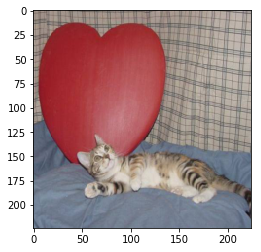

In [65]:
imshow(train[50][0])

In [68]:
train_data_gen = torch.utils.data.DataLoader(train, batch_size=64, num_workers=8)
valid_data_gen = torch.utils.data.DataLoader(valid, batch_size=64, num_workers=8)

In [71]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = Linear(num_ftrs, 2)
model_ft = model_ft.cuda()

In [72]:
model_ft.fc

Linear(in_features=512, out_features=2, bias=True)

In [73]:
print(model_ft)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [74]:
learning_rate = 0.001
criterion = torch.nn.CrossEntropyLoss()
optimizer_ft = torch.optim.SGD(model_ft.parameters(), lr=learning_rate, momentum=0.9)
exp_lr_sheduler = torch.optim.lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [77]:
def train_model(model, criterion, optimizer, sheduler, num_epochs=25):
    since = time.time()
    best_model_wts = model.state_dict()
    best_acc = 0.0
    for epoch in range(num_epochs):
        print("Epoch {}/{}".format(epoch, num_epochs - 1))
        print("-" * 10)
        for phase in ['train', 'valid']:
            if phase == 'train':
                sheduler.step()
                model.train(True)
            else:
                model.train(False)
            running_loss = 0.0
            running_corrects = 0
            for data in dataloaders[phase]:
                inputs, labels = data
                if is_cuda:
                    inputs = Variable(inputs.cuda())
                    labels = Variable(labels.cuda())
                else:
                    inputs = Variable(inputs)
                    labels = Variable(labels)
                optimizer.zero_gradient()
                
                outputs = model(inputs)
                _, preds = torch.max(outputs.data, 1)
                loss = criterion(outputs, labels)
                
                if phase == 'train':
                    loss.backward()
                    optimizer.step()
                running_loss += loss.data[0]
                running_corrects += torch.sum(preds == labels.data)
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]
            print("{} Loss: {:.4f} Acc: {:.4f}")
            
            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()
    time_elapsed = time.time() - since
    print()
    print("Training complete in {:.0f}m {:.0}s".format(time_elapsed // 60, time_elapsed % 60))
        